In [1]:
import pandas as pd
import itertools
from functools import partial
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import seaborn as sns
from scipy import stats

In [2]:
# Copy from sequence_metrics.ipynb
import itertools
from collections import defaultdict, Counter

def drr(lst):
    def num_direct_repeat_events(lst):
        pairs = itertools.pairwise(lst)
        same_pairs = map(lambda x: x[0] == x[1], pairs)
        return sum(same_pairs)
    if len(lst) < 2:
        return 0
    num = num_direct_repeat_events(lst)
    return num/(len(lst) - 1)

def rrdist(lst):
    def count_items_between_duplicates(lst):
        counts = defaultdict(int)
        index_dict = {}

        for i, item in enumerate(lst):
            if item in index_dict:
                distance = i - index_dict[item]
                counts[distance] += 1
            index_dict[item] = i

        return counts
    cnt = count_items_between_duplicates(lst)
    if not cnt:
        return 0
    return sum(cnt.values())/sum(k*v for k,v in cnt.items())

def uniq(lst, labels):
    if len(lst) < 2:
        return 1
    max_uniq = min(len(lst), len(labels))-1
    uniq_in_list = len(set(lst))-1
    return uniq_in_list/max_uniq

def gini(lst):
    counts = Counter(lst)
    sum_probs = sum((i/len(lst))**2 for _, i in counts.items())
    return 1 - sum_probs

# RQ1 User History

In [3]:
behavior_df = pd.read_csv("/kaggle/input/mind-to-label-sequences/behavior_label_sequences.csv", index_col=0)
behavior_df

,user_id,datetime,history,impression,category_history,framelabel_history,framedimension_history,framestructure_history,category_impression,framelabel_impression,framedimension_impression,framestructure_impression
1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0,tv sports tv news sports lifestyle movies news...,capacity capacity public crime economic morali...,degredation cheating betrayal authority subver...,other win-01 say-01 arrest-01 other other die-...,sports-1 news-0,quality-1 economic-0,degredation-1 betrayal-0,die-01-1 kill-01-0
2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...,news news news finance travel news news news n...,crime economic quality economic quality crime ...,cheating degredation authority cheating harm b...,say-01 other find-01 other kill-01 say-01 die-...,sports-0 news-0 autos-0 news-0 news-0 finance-...,capacity-0 political-0 economic-0 crime-0 qual...,degredation-0 cheating-0 subversion-0 degredat...,other-0 other-0 other-0 charge-05-0 say-01-0 o...
3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...,lifestyle lifestyle news sports tv weather spo...,economic quality quality capacity capacity qua...,subversion betrayal degredation harm betrayal ...,cause-01 other other report-01 other other cau...,sports-0 news-0 finance-0 news-0 autos-0 sport...,capacity-0 crime-0 economic-0 capacity-0 econo...,cheating-0 degredation-0 subversion-0 fairness...,cause-01-0 say-01-0 other-0 kill-01-0 other-0 ...
4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0,tv sports tv finance finance sports lifestyle ...,crime public crime economic economic crime eco...,cheating harm degredation subversion subversio...,arrest-01 other die-01 other have-degree-91 ar...,news-0 sports-0 music-1 finance-0,economic-0 capacity-0 quality-1 political-0,betrayal-0 cheating-0 degredation-1 betrayal-0,kill-01-0 other-0 die-01-1 other-0
5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...,autos travel weather health,economic economic quality economic,fairness betrayal degredation care,other other have-degree-91 other,finance-0 finance-0 news-0 autos-1 finance-0 w...,economic-0 capacity-0 quality-0 economic-1 eco...,harm-0 fairness-0 degredation-0 degredation-1 ...,have-03-0 other-0 other-0 other-1 other-0 othe...
...,...,...,...,...,...,...,...,...,...,...,...,...
156961,U21593,11/14/2019 10:24:05 PM,N7432 N58559 N1954 N43353 N14343 N13008 N28833...,N2235-0 N22975-0 N64037-0 N47652-0 N11378-0 N4...,video news news news news finance video lifest...,quality crime political crime economic economi...,betrayal fairness harm betrayal betrayal harm ...,have-degree-91 say-01 other say-01 other other...,sports-0 finance-0 news-0 sports-0 video-0 new...,capacity-0 economic-0 quality-0 security-0 qua...,sanctity-0 cheating-0 betrayal-0 loyalty-0 sub...,win-01-0 have-degree-91-0 other-0 other-0 watc...
156962,U10123,11/13/2019 6:57:04 AM,N9803 N104 N24462 N57318 N55743 N40526 N31726 ...,N3841-0 N61571-0 N58813-0 N28213-0 N4428-0 N25...,finance sports sports news lifestyle music spo...,economic quality quality quality quality quali...,betrayal loyalty loyalty authority degredation...,have-degree-91 other other other show-01 other...,entertainment-0 foodanddrink-0 news-0 finance-...,quality-0 economic-0 economic-0 economic-0 mor...,betrayal-0 cheating-0 subversion-0 cheating-0 ...,other-0 other-0 other-0 have-degree-91-0 other...
156963,U75630,11/14/2019 10:58:13 AM,N29898 N59704 N4408 N9803 N53644 N26103 N812 N...,N55913-0 N62318-0 N53515-0 N10960-0 N9135-0 N5...,travel news sports finance foodanddrink travel...,economic security capacity economic capacity c...,authority harm cheating betrayal subversion ca...,other say-01 be-l

In [4]:
SEQ_NAME = "history"
behavior_df = behavior_df.drop_duplicates(subset=["user_id"], keep="first")
len(behavior_df), behavior_df["user_id"].nunique()

(49108, 49108)

In [5]:
behavior_df["category_history"].to_csv("category_history.txt", index=False, header=False)
behavior_df["framelabel_history"].to_csv("framelabel_history.txt", index=False, header=False)
behavior_df["framedimension_history"].to_csv("framedimension_history.txt", index=False, header=False)
behavior_df["framestructure_history"].to_csv("framestructure_history.txt", index=False, header=False)

In [6]:
!head -n1 category_history.txt
!head -n1 framelabel_history.txt
!head -n1 framedimension_history.txt
!head -n1 framestructure_history.txt

!wc -l category_history.txt
!wc -l framelabel_history.txt
!wc -l framedimension_history.txt
!wc -l framestructure_history.txt

tv sports tv news sports lifestyle movies news news
capacity capacity public crime economic morality economic political morality
degredation cheating betrayal authority subversion loyalty authority betrayal betrayal
other win-01 say-01 arrest-01 other other die-01 die-01 report-01
49108 category_history.txt
49108 framelabel_history.txt
49108 framedimension_history.txt
49108 framestructure_history.txt


In [7]:
behavior_df["history"].str.split().map(len).describe()

count    49108.000000
mean        18.857579
std         23.984882
min          1.000000
25%          6.000000
50%         11.000000
75%         23.000000
max        558.000000
Name: history, dtype: float64

In [8]:
distinct_categories_history = set(" ".join(itertools.chain(behavior_df["category_history"])).split())
distinct_categories_impression = set(" ".join(itertools.chain(behavior_df["category_impression"].map(lambda x: x.split("-")[0]))).split())
distinct_categories = distinct_categories_history | distinct_categories_impression
print(len(distinct_categories), list(distinct_categories))

16 ['autos', 'tv', 'foodanddrink', 'travel', 'music', 'health', 'movies', 'weather', 'video', 'news', 'sports', 'entertainment', 'lifestyle', 'middleeast', 'finance', 'kids']


In [9]:
behavior_df["drr_category_history"] = behavior_df["category_history"].str.split().map(drr)
behavior_df["rrdist_category_history"] = behavior_df["category_history"].str.split().map(rrdist)
behavior_df["uniq_category_history"] = behavior_df["category_history"].str.split().map(partial(uniq, labels=distinct_categories))
behavior_df["gini_category_history"] = behavior_df["category_history"].str.split().map(gini)
behavior_df[["drr_category_history", "rrdist_category_history", "uniq_category_history", "gini_category_history"]].describe()

/tmp/ipykernel_19/1216683008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior_df["drr_category_history"] = behavior_df["category_history"].str.split().map(drr)
/tmp/ipykernel_19/1216683008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior_df["rrdist_category_history"] = behavior_df["category_history"].str.split().map(rrdist)
/tmp/ipykernel_19/1216683008.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,drr_category_history,rrdist_category_history,uniq_category_history,gini_category_history
count,49108.000000,49108.000000,49108.000000,49108.000000
mean,0.219373,0.388041,0.545311,0.671545
std,0.206608,0.279926,0.227225,0.185834
min,0.000000,0.000000,0.000000,0.000000
25%,0.066667,0.200000,0.400000,0.618612
50%,0.184211,0.333333,0.500000,0.722222
75%,0.320000,0.500000,0.666667,0.797784
max,1.000000,1.000000,1.000000,0.911565


In [10]:
distinct_framelabels_history = set(" ".join(itertools.chain(behavior_df["framelabel_history"])).split())
distinct_framelabels_impression = set(" ".join(itertools.chain(behavior_df["framelabel_impression"].map(lambda x: x.split("-")[0]))).split())
distinct_framelabels = distinct_framelabels_history | distinct_framelabels_impression
print(len(distinct_framelabels), list(distinct_framelabels))

15 ['fairness', 'morality', 'quality', 'security', 'public', 'health', 'crime', 'other', 'cultural', 'political', 'economic', 'policy', 'legality,', 'capacity', 'external']


In [11]:
behavior_df["drr_framelabel_history"] = behavior_df["framelabel_history"].str.split().map(drr)
behavior_df["rrdist_framelabel_history"] = behavior_df["framelabel_history"].str.split().map(rrdist)
behavior_df["uniq_framelabel_history"] = behavior_df["framelabel_history"].str.split().map(partial(uniq, labels=distinct_framelabels))
behavior_df["gini_framelabel_history"] = behavior_df["framelabel_history"].str.split().map(gini)
behavior_df[["drr_framelabel_history", "rrdist_framelabel_history", "uniq_framelabel_history", "gini_framelabel_history"]].describe()

/tmp/ipykernel_19/3742635062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior_df["drr_framelabel_history"] = behavior_df["framelabel_history"].str.split().map(drr)
/tmp/ipykernel_19/3742635062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior_df["rrdist_framelabel_history"] = behavior_df["framelabel_history"].str.split().map(rrdist)
/tmp/ipykernel_19/3742635062.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,drr_framelabel_history,rrdist_framelabel_history,uniq_framelabel_history,gini_framelabel_history
count,49108.000000,49108.000000,49108.000000,49108.000000
mean,0.190817,0.364097,0.528795,0.695639
std,0.170885,0.261795,0.212413,0.158903
min,0.000000,0.000000,0.000000,0.000000
25%,0.066667,0.204545,0.384615,0.656250
50%,0.173333,0.300000,0.500000,0.743607
75%,0.266667,0.500000,0.642857,0.793388
max,1.000000,1.000000,1.000000,0.880886


In [12]:
distinct_framedimensions_history = set(" ".join(itertools.chain(behavior_df["framedimension_history"])).split())
distinct_framedimensions_impression = set(" ".join(itertools.chain(behavior_df["framedimension_impression"].map(lambda x: x.split("-")[0]))).split())
distinct_framedimensions = distinct_framedimensions_history | distinct_framedimensions_impression
print(len(distinct_framedimensions), list(distinct_framedimensions))

10 ['loyalty', 'fairness', 'care', 'betrayal', 'sanctity', 'degredation', 'harm', 'authority', 'cheating', 'subversion']


In [13]:
behavior_df["drr_framedimension_history"] = behavior_df["framedimension_history"].str.split().map(drr)
behavior_df["rrdist_framedimension_history"] = behavior_df["framedimension_history"].str.split().map(rrdist)
behavior_df["uniq_framedimension_history"] = behavior_df["framedimension_history"].str.split().map(partial(uniq, labels=distinct_framedimensions))
behavior_df["gini_framedimension_history"] = behavior_df["framedimension_history"].str.split().map(gini)
behavior_df[["drr_framedimension_history", "rrdist_framedimension_history", "uniq_framedimension_history", "gini_framedimension_history"]].describe()

/tmp/ipykernel_19/4254752908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior_df["drr_framedimension_history"] = behavior_df["framedimension_history"].str.split().map(drr)
/tmp/ipykernel_19/4254752908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior_df["rrdist_framedimension_history"] = behavior_df["framedimension_history"].str.split().map(rrdist)
/tmp/ipykernel_19/4254752908.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

,drr_framedimension_history,rrdist_framedimension_history,uniq_framedimension_history,gini_framedimension_history
count,49108.000000,49108.000000,49108.000000,49108.000000
mean,0.133613,0.316369,0.745924,0.746373
std,0.144060,0.264837,0.200208,0.155212
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.157132,0.600000,0.720000
50%,0.113208,0.246154,0.777778,0.795918
75%,0.200000,0.400000,0.888889,0.840000
max,1.000000,1.000000,1.000000,0.895085


In [14]:
distinct_framestructure_history = set(" ".join(itertools.chain(behavior_df["framestructure_history"])).split())
distinct_framestructure_impression = set(" ".join(itertools.chain(behavior_df["framestructure_impression"].str.split(" ").map(lambda x: " ".join([i[:-2] for i in x])))).split(" "))
distinct_framestructure = distinct_framestructure_history | distinct_framestructure_impression
print(len(distinct_framestructure), list(distinct_framestructure))

24 ['contrast-01', 'open-01', 'announce-01', 'watch-01', 'say-01', 'arrest-01', 'have-03', 'be-located-at-91', 'have-degree-91', 'charge-05', 'reveal-01', 'cause-01', 'win-01', 'find-01', 'show-01', 'want-01', 'recommend-01', 'get-01', 'other', 'die-01', 'close-01', 'kill-01', 'possible-01', 'report-01']


In [15]:
behavior_df["drr_framestructure_history"] = behavior_df["framestructure_history"].dropna().str.split().map(drr)
behavior_df["rrdist_framestructure_history"] = behavior_df["framestructure_history"].dropna().str.split().map(rrdist)
behavior_df["uniq_framestructure_history"] = behavior_df["framestructure_history"].dropna().str.split().map(partial(uniq, labels=distinct_framestructure))
behavior_df["gini_framestructure_history"] = behavior_df["framestructure_history"].dropna().str.split().map(gini)
behavior_df[["drr_framestructure_history", "rrdist_framestructure_history", "uniq_framestructure_history", "gini_framestructure_history"]].describe()

/tmp/ipykernel_19/1463896660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior_df["drr_framestructure_history"] = behavior_df["framestructure_history"].dropna().str.split().map(drr)
/tmp/ipykernel_19/1463896660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior_df["rrdist_framestructure_history"] = behavior_df["framestructure_history"].dropna().str.split().map(rrdist)
/tmp/ipykernel_19/1463896660.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

,drr_framestructure_history,rrdist_framestructure_history,uniq_framestructure_history,gini_framestructure_history
count,49108.000000,49108.000000,49108.000000,49108.000000
mean,0.286126,0.453221,0.488339,0.611506
std,0.217538,0.286427,0.229216,0.182779
min,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.250000,0.333333,0.545455
50%,0.271605,0.401087,0.444444,0.661157
75%,0.400000,0.640000,0.600000,0.733926
max,1.000000,1.000000,1.000000,0.909091


In [16]:
means = pd.DataFrame({
    "category_history":       pd.Series(behavior_df[["drr_category_history", "rrdist_category_history", "uniq_category_history", "gini_category_history"]].mean().tolist(), index=["drr", "rrdist", "uniq", "gini"]),
    "framelabel_history":     pd.Series(behavior_df[["drr_framelabel_history", "rrdist_framelabel_history", "uniq_framelabel_history", "gini_framelabel_history"]].mean().tolist(), index=["drr", "rrdist", "uniq", "gini"]),
    "framedimension_history": pd.Series(behavior_df[["drr_framedimension_history", "rrdist_framedimension_history", "uniq_framedimension_history", "gini_framedimension_history"]].mean().tolist(), index=["drr", "rrdist", "uniq", "gini"]),
    "framestructure_history": pd.Series(behavior_df[["drr_framestructure_history", "rrdist_framestructure_history", "uniq_framestructure_history", "gini_framestructure_history"]].mean().tolist(), index=["drr", "rrdist", "uniq", "gini"]),
})
means.style.background_gradient(axis=1)

,category_history,framelabel_history,framedimension_history,framestructure_history
drr,0.219373,0.190817,0.133613,0.286126
rrdist,0.388041,0.364097,0.316369,0.453221
uniq,0.545311,0.528795,0.745924,0.488339
gini,0.671545,0.695639,0.746373,0.611506


In [17]:
sems = pd.DataFrame({
    "category_history":       pd.Series(behavior_df[["drr_category_history", "rrdist_category_history", "uniq_category_history", "gini_category_history"]].sem().tolist(), index=["drr", "rrdist", "uniq", "gini"]),
    "framelabel_history":     pd.Series(behavior_df[["drr_framelabel_history", "rrdist_framelabel_history", "uniq_framelabel_history", "gini_framelabel_history"]].sem().tolist(), index=["drr", "rrdist", "uniq", "gini"]),
    "framedimension_history": pd.Series(behavior_df[["drr_framedimension_history", "rrdist_framedimension_history", "uniq_framedimension_history", "gini_framedimension_history"]].sem().tolist(), index=["drr", "rrdist", "uniq", "gini"]),
    "framestructure_history": pd.Series(behavior_df[["drr_framestructure_history", "rrdist_framestructure_history", "uniq_framestructure_history", "gini_framestructure_history"]].sem().tolist(), index=["drr", "rrdist", "uniq", "gini"]),
})
sems.style.background_gradient(axis=1)

,category_history,framelabel_history,framedimension_history,framestructure_history
drr,0.000932,0.000771,0.000650,0.000982
rrdist,0.001263,0.001181,0.001195,0.001293
uniq,0.001025,0.000959,0.000903,0.001034
gini,0.000839,0.000717,0.000700,0.000825


In [18]:
stds = pd.DataFrame({
    "category_history":       pd.Series(behavior_df[["drr_category_history", "rrdist_category_history", "uniq_category_history", "gini_category_history"]].std().tolist(), index=["drr", "rrdist", "uniq", "gini"]),
    "framelabel_history":     pd.Series(behavior_df[["drr_framelabel_history", "rrdist_framelabel_history", "uniq_framelabel_history", "gini_framelabel_history"]].std().tolist(), index=["drr", "rrdist", "uniq", "gini"]),
    "framedimension_history": pd.Series(behavior_df[["drr_framedimension_history", "rrdist_framedimension_history", "uniq_framedimension_history", "gini_framedimension_history"]].std().tolist(), index=["drr", "rrdist", "uniq", "gini"]),
    "framestructure_history": pd.Series(behavior_df[["drr_framestructure_history", "rrdist_framestructure_history", "uniq_framestructure_history", "gini_framestructure_history"]].std().tolist(), index=["drr", "rrdist", "uniq", "gini"]),
})
stds.style.background_gradient(axis=1)

,category_history,framelabel_history,framedimension_history,framestructure_history
drr,0.206608,0.170885,0.144060,0.217538
rrdist,0.279926,0.261795,0.264837,0.286427
uniq,0.227225,0.212413,0.200208,0.229216
gini,0.185834,0.158903,0.155212,0.182779


In [19]:
print((means.applymap("{:.4f}".format) + "±" + stds.applymap("{:.2f}".format)).to_latex())

\begin{tabular}{lllll}
\toprule
 & category_history & framelabel_history & framedimension_history & framestructure_history \\
\midrule
drr & 0.2194±0.21 & 0.1908±0.17 & 0.1336±0.14 & 0.2861±0.22 \\
rrdist & 0.3880±0.28 & 0.3641±0.26 & 0.3164±0.26 & 0.4532±0.29 \\
uniq & 0.5453±0.23 & 0.5288±0.21 & 0.7459±0.20 & 0.4883±0.23 \\
gini & 0.6715±0.19 & 0.6956±0.16 & 0.7464±0.16 & 0.6115±0.18 \\
\bottomrule
\end{tabular}



In [20]:
print(stats.f_oneway(behavior_df["drr_category_history"], behavior_df["drr_framelabel_history"], behavior_df["drr_framedimension_history"], behavior_df["drr_framestructure_history"]))
print(stats.f_oneway(behavior_df["rrdist_category_history"], behavior_df["rrdist_framelabel_history"], behavior_df["rrdist_framedimension_history"], behavior_df["rrdist_framestructure_history"]))
print(stats.f_oneway(behavior_df["uniq_category_history"], behavior_df["uniq_framelabel_history"], behavior_df["uniq_framedimension_history"], behavior_df["uniq_framestructure_history"]))
print(stats.f_oneway(behavior_df["gini_category_history"], behavior_df["gini_framelabel_history"], behavior_df["gini_framedimension_history"], behavior_df["gini_framestructure_history"]))

F_onewayResult(statistic=5642.105599783327, pvalue=0.0)
F_onewayResult(statistic=2129.57659672025, pvalue=0.0)
F_onewayResult(statistic=13734.870488948787, pvalue=0.0)
F_onewayResult(statistic=5251.432939975633, pvalue=0.0)


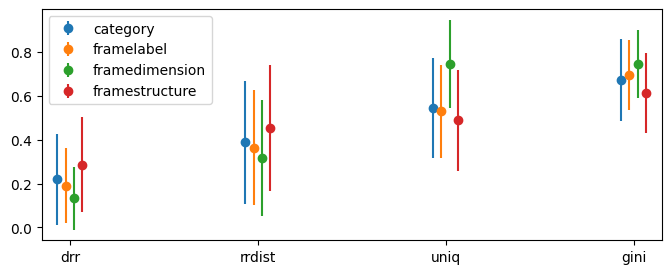

In [21]:
plt.figure(figsize=(8,3))

offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.errorbar(means.index, means["category_history"], yerr=stds["category_history"], label="category", fmt="o", transform=trans+offset(-9))
plt.errorbar(means.index, means["framelabel_history"], yerr=stds["framelabel_history"], label="framelabel", fmt="o", transform=trans+offset(-3))
plt.errorbar(means.index, means["framedimension_history"], yerr=stds["framedimension_history"], label="framedimension", fmt="o", transform=trans+offset(+3))
plt.errorbar(means.index, means["framestructure_history"], yerr=stds["framestructure_history"], label="framestructure", fmt="o", transform=trans+offset(+9))

plt.legend()

plt.savefig(f"means_{SEQ_NAME}.pdf")
plt.show()

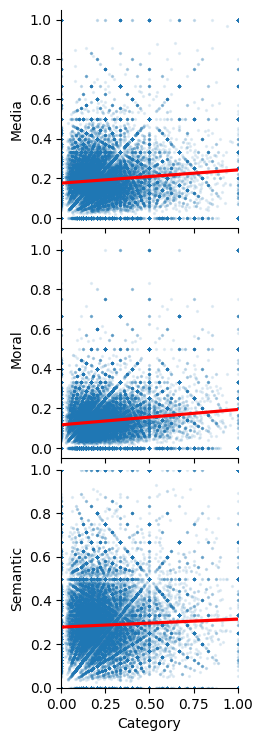

In [22]:
drrs = behavior_df[behavior_df.columns[behavior_df.columns.str.startswith("drr")]].rename(columns={
    "drr_category_history": "Category",
    "drr_framelabel_history": "Media",
    "drr_framedimension_history": "Moral",
    "drr_framestructure_history": "Semantic",
})
g = sns.pairplot(drrs, kind="reg", x_vars=["Category"], y_vars=["Media", "Moral", "Semantic"], 
                 plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'s': 2, 'alpha': 0.1}})
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig(f"drr_pairplot_{SEQ_NAME}.png")
plt.show()

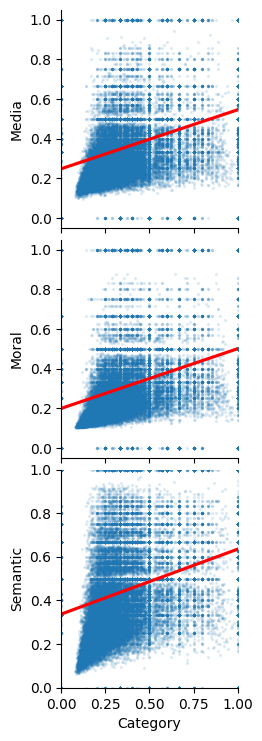

In [23]:
rrdists = behavior_df[behavior_df.columns[behavior_df.columns.str.startswith("rrdist")]].rename(columns={
    "rrdist_category_history": "Category",
    "rrdist_framelabel_history": "Media",
    "rrdist_framedimension_history": "Moral",
    "rrdist_framestructure_history": "Semantic",
})
sns.pairplot(rrdists, kind="reg", x_vars=["Category"], y_vars=["Media", "Moral", "Semantic"], 
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'s': 2, 'alpha': 0.1}})
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig(f"rrdist_pairplot_{SEQ_NAME}.png")
plt.show()

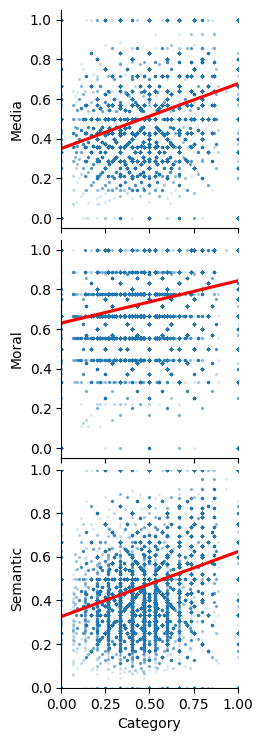

In [24]:
uniqs = behavior_df[behavior_df.columns[behavior_df.columns.str.startswith("uniq") & behavior_df.columns.str.endswith("history")]].rename(columns={
    "uniq_category_history": "Category",
    "uniq_framelabel_history": "Media",
    "uniq_framedimension_history": "Moral",
    "uniq_framestructure_history": "Semantic",
})
sns.pairplot(uniqs, kind="reg", x_vars=["Category"], y_vars=["Media", "Moral", "Semantic"], 
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'s': 2, 'alpha': 0.1}})
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig(f"uniq_pairplot_{SEQ_NAME}.png")
plt.show()

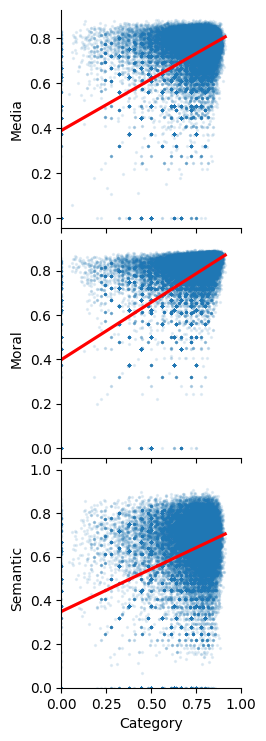

In [25]:
ginis = behavior_df[behavior_df.columns[behavior_df.columns.str.startswith("gini")]].rename(columns={
    "gini_category_history": "Category",
    "gini_framelabel_history": "Media",
    "gini_framedimension_history": "Moral",
    "gini_framestructure_history": "Semantic",
})
sns.pairplot(ginis, kind="reg", x_vars=["Category"], y_vars=["Media", "Moral", "Semantic"], 
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'s': 2, 'alpha': 0.1}})
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig(f"gini_pairplot_{SEQ_NAME}.png")
plt.show()

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


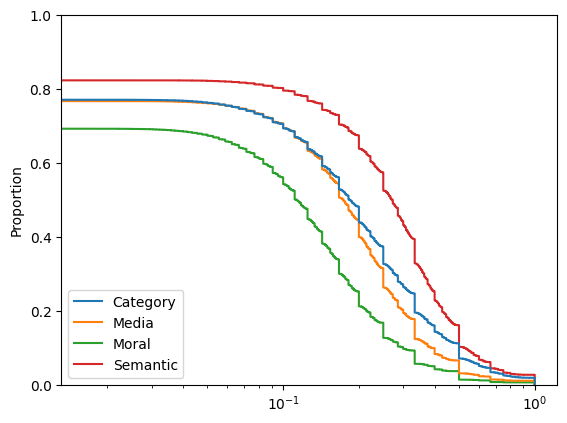

In [26]:
ax = sns.ecdfplot(drrs, complementary=True, log_scale=True)
sns.move_legend(ax, "lower left")
plt.savefig(f"drr_ecdf_{SEQ_NAME}.pdf")
plt.show()

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


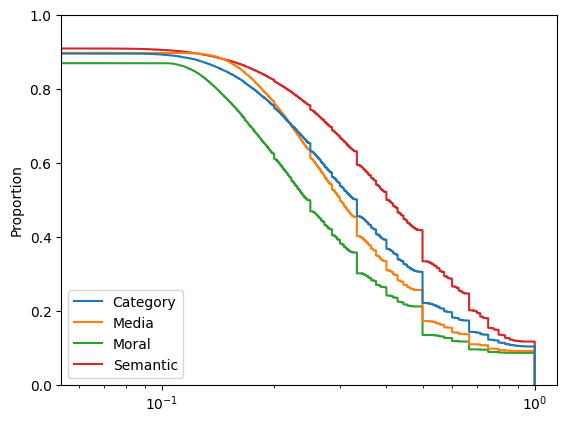

In [27]:
ax = sns.ecdfplot(rrdists, complementary=True, log_scale=True)
sns.move_legend(ax, "lower left")
plt.savefig(f"rrdist_ecdf_{SEQ_NAME}.pdf")
plt.show()

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


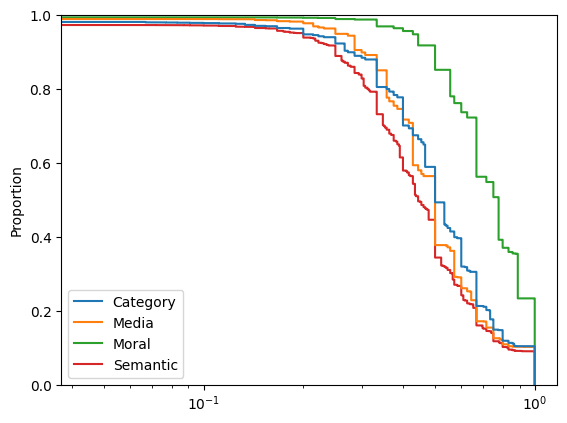

In [28]:
ax = sns.ecdfplot(uniqs, complementary=True, log_scale=True)
sns.move_legend(ax, "lower left")
plt.savefig(f"uniq_ecdf_{SEQ_NAME}.pdf")
plt.show()

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


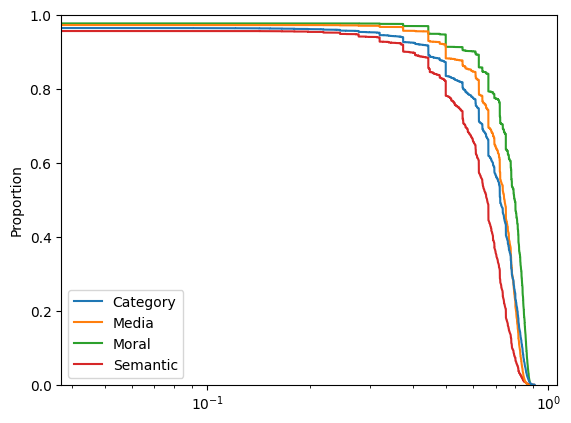

In [29]:
ax = sns.ecdfplot(ginis, complementary=True, log_scale=True)
sns.move_legend(ax, "lower left")
plt.savefig(f"gini_ecdf_{SEQ_NAME}.pdf")
plt.show()

# RQ2 Per Category

In [30]:
per_category_df = pd.read_csv("/kaggle/input/mind-to-label-sequences/behavior_label_sequences.csv", index_col=0)
per_category_df

,user_id,datetime,history,impression,category_history,framelabel_history,framedimension_history,framestructure_history,category_impression,framelabel_impression,framedimension_impression,framestructure_impression
1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0,tv sports tv news sports lifestyle movies news...,capacity capacity public crime economic morali...,degredation cheating betrayal authority subver...,other win-01 say-01 arrest-01 other other die-...,sports-1 news-0,quality-1 economic-0,degredation-1 betrayal-0,die-01-1 kill-01-0
2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...,news news news finance travel news news news n...,crime economic quality economic quality crime ...,cheating degredation authority cheating harm b...,say-01 other find-01 other kill-01 say-01 die-...,sports-0 news-0 autos-0 news-0 news-0 finance-...,capacity-0 political-0 economic-0 crime-0 qual...,degredation-0 cheating-0 subversion-0 degredat...,other-0 other-0 other-0 charge-05-0 say-01-0 o...
3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...,lifestyle lifestyle news sports tv weather spo...,economic quality quality capacity capacity qua...,subversion betrayal degredation harm betrayal ...,cause-01 other other report-01 other other cau...,sports-0 news-0 finance-0 news-0 autos-0 sport...,capacity-0 crime-0 economic-0 capacity-0 econo...,cheating-0 degredation-0 subversion-0 fairness...,cause-01-0 say-01-0 other-0 kill-01-0 other-0 ...
4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0,tv sports tv finance finance sports lifestyle ...,crime public crime economic economic crime eco...,cheating harm degredation subversion subversio...,arrest-01 other die-01 other have-degree-91 ar...,news-0 sports-0 music-1 finance-0,economic-0 capacity-0 quality-1 political-0,betrayal-0 cheating-0 degredation-1 betrayal-0,kill-01-0 other-0 die-01-1 other-0
5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...,autos travel weather health,economic economic quality economic,fairness betrayal degredation care,other other have-degree-91 other,finance-0 finance-0 news-0 autos-1 finance-0 w...,economic-0 capacity-0 quality-0 economic-1 eco...,harm-0 fairness-0 degredation-0 degredation-1 ...,have-03-0 other-0 other-0 other-1 other-0 othe...
...,...,...,...,...,...,...,...,...,...,...,...,...
156961,U21593,11/14/2019 10:24:05 PM,N7432 N58559 N1954 N43353 N14343 N13008 N28833...,N2235-0 N22975-0 N64037-0 N47652-0 N11378-0 N4...,video news news news news finance video lifest...,quality crime political crime economic economi...,betrayal fairness harm betrayal betrayal harm ...,have-degree-91 say-01 other say-01 other other...,sports-0 finance-0 news-0 sports-0 video-0 new...,capacity-0 economic-0 quality-0 security-0 qua...,sanctity-0 cheating-0 betrayal-0 loyalty-0 sub...,win-01-0 have-degree-91-0 other-0 other-0 watc...
156962,U10123,11/13/2019 6:57:04 AM,N9803 N104 N24462 N57318 N55743 N40526 N31726 ...,N3841-0 N61571-0 N58813-0 N28213-0 N4428-0 N25...,finance sports sports news lifestyle music spo...,economic quality quality quality quality quali...,betrayal loyalty loyalty authority degredation...,have-degree-91 other other other show-01 other...,entertainment-0 foodanddrink-0 news-0 finance-...,quality-0 economic-0 economic-0 economic-0 mor...,betrayal-0 cheating-0 subversion-0 cheating-0 ...,other-0 other-0 other-0 have-degree-91-0 other...
156963,U75630,11/14/2019 10:58:13 AM,N29898 N59704 N4408 N9803 N53644 N26103 N812 N...,N55913-0 N62318-0 N53515-0 N10960-0 N9135-0 N5...,travel news sports finance foodanddrink travel...,economic security capacity economic capacity c...,authority harm cheating betrayal subversion ca...,other say-01 be-l

In [31]:
def groupby_first(pairs, min_count=2):
    assert len(pairs) == 2
    firsts, seconds = pairs[0].split(), pairs[1].split()
    assert len(firsts) == len(seconds)
    sequences_per_first = defaultdict(list)
    for first, second in zip(firsts, seconds):
        sequences_per_first[first].append(second)
    sequences_per_first_filtered = list(filter(lambda x: len(x) >= min_count, sequences_per_first.values()))
    return [" ".join(x) for x in sequences_per_first_filtered]

per_category_df["framelabel_history_per_category"] = list(map(groupby_first, zip(per_category_df["category_history"], per_category_df["framelabel_history"])))
per_category_df["framedimension_history_per_category"] = list(map(groupby_first, zip(per_category_df["category_history"], per_category_df["framedimension_history"])))
per_category_df["framestructure_history_per_category"] = list(map(groupby_first, zip(per_category_df["category_history"], per_category_df["framestructure_history"])))
per_category_df[["framelabel_history_per_category", "framedimension_history_per_category", "framestructure_history_per_category"]]

,framelabel_history_per_category,framedimension_history_per_category,framestructure_history_per_category
1,"[capacity public, capacity economic, crime pol...","[degredation betrayal, cheating subversion, au...","[other say-01, win-01 other, arrest-01 die-01 ..."
2,[crime economic quality crime quality crime cr...,[cheating degredation authority betrayal betra...,[say-01 other find-01 say-01 die-01 other othe...
3,"[economic quality economic quality economic, q...",[subversion betrayal subversion cheating betra...,"[cause-01 other other find-01 have-degree-91, ..."
4,"[crime crime, public crime economic capacity, ...","[cheating degredation, harm cheating cheating ...","[arrest-01 die-01, other arrest-01 other open-..."
5,[],[],[]
...,...,...,...
156961,"[quality capacity capacity security, crime pol...","[betrayal authority authority sanctity, fairne...",[have-degree-91 have-degree-91 have-degree-91 ...
156962,"[economic public economic economic economic, q...",[betrayal degredation harm degredation degreda...,[have-degree-91 die-01 other other be-located-...
156963,"[economic capacity, security economic economic...","[authority care, harm authority sanctity betra...","[other possible-01, say-01 cause-01 other caus..."
156964,[capacity quality economic quality quality qua...,[subversion cheating care subversion cheating ...,[other find-01 other other other other have-de...


In [32]:
framelabel_history_per_category = per_category_df["framelabel_history_per_category"].explode().dropna()
framelabel_history_per_category.to_csv("framelabel_history_per_category.txt", index=False, header=False)
framedimension_history_per_category = per_category_df["framedimension_history_per_category"].explode().dropna()
framedimension_history_per_category.to_csv("framedimension_history_per_category.txt", index=False, header=False)
framestructure_history_per_category = per_category_df["framestructure_history_per_category"].explode().dropna()
framestructure_history_per_category.to_csv("framestructure_history_per_category.txt", index=False, header=False)

In [33]:
!head -n1 framelabel_history_per_category.txt
!head -n1 framedimension_history_per_category.txt
!head -n1 framestructure_history_per_category.txt

!wc -l framelabel_history_per_category.txt
!wc -l framedimension_history_per_category.txt
!wc -l framestructure_history_per_category.txt

capacity public
degredation betrayal
other say-01
687054 framelabel_history_per_category.txt
687054 framedimension_history_per_category.txt
687054 framestructure_history_per_category.txt


In [34]:
def to_metrics(sequence_series, distinct_labels):
    drr_s = sequence_series.str.split().map(drr).rename("DRR")
    rrdist_s = sequence_series.str.split().map(rrdist).rename("RRdist")
    uniq_s = sequence_series.str.split().map(partial(uniq, labels=distinct_labels)).rename("Uniq")
    gini_s = sequence_series.str.split().map(gini).rename("Gini")
    metrics_df = pd.concat([drr_s, rrdist_s, uniq_s, gini_s], axis=1)
    return metrics_df

In [35]:
framelabel_per_category_df = to_metrics(framelabel_history_per_category, distinct_labels=distinct_framelabels)
framelabel_per_category_df.describe()

,DRR,RRdist,Uniq,Gini
count,687054.000000,687054.000000,687054.000000,687054.000000
mean,0.298952,0.470289,0.552272,0.505820
std,0.349556,0.395193,0.348939,0.243013
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.333333,0.444444
50%,0.186992,0.428571,0.500000,0.500000
75%,0.500000,1.000000,1.000000,0.666667
max,1.000000,1.000000,1.000000,0.882716


In [36]:
framedimension_per_category_df = to_metrics(framedimension_history_per_category, distinct_labels=distinct_framedimensions)
framedimension_per_category_df.describe()

,DRR,RRdist,Uniq,Gini
count,687054.000000,687054.000000,687054.000000,687054.000000
mean,0.159073,0.335420,0.738524,0.605139
std,0.256805,0.368488,0.281340,0.194349
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.555556,0.500000
50%,0.000000,0.250000,0.777778,0.660000
75%,0.250000,0.500000,1.000000,0.750000
max,1.000000,1.000000,1.000000,0.891250


In [37]:
framestructure_per_category_df = to_metrics(framestructure_history_per_category, distinct_labels=distinct_framestructure)
framestructure_per_category_df.describe()

,DRR,RRdist,Uniq,Gini
count,687054.000000,687054.000000,687054.000000,687054.000000
mean,0.321717,0.497872,0.545357,0.488553
std,0.348530,0.396375,0.349546,0.234453
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.304348,0.444444
50%,0.250000,0.500000,0.500000,0.500000
75%,0.500000,1.000000,1.000000,0.666667
max,1.000000,1.000000,1.000000,0.902778


In [38]:
means = pd.DataFrame({
    "Media Frames": framelabel_per_category_df.mean(),
    "Moral Frames": framedimension_per_category_df.mean(),
    "Semantic Frames": framestructure_per_category_df.mean(),
})
means.style.background_gradient(axis=1)

,Media Frames,Moral Frames,Semantic Frames
DRR,0.298952,0.159073,0.321717
RRdist,0.470289,0.335420,0.497872
Uniq,0.552272,0.738524,0.545357
Gini,0.505820,0.605139,0.488553


In [39]:
sems = pd.DataFrame({
    "Media Frames": framelabel_per_category_df.sem(),
    "Moral Frames": framedimension_per_category_df.sem(),
    "Semantic Frames": framestructure_per_category_df.sem(),
})
sems.style.background_gradient(axis=1)

,Media Frames,Moral Frames,Semantic Frames
DRR,0.000422,0.000310,0.000420
RRdist,0.000477,0.000445,0.000478
Uniq,0.000421,0.000339,0.000422
Gini,0.000293,0.000234,0.000283


In [40]:
stds = pd.DataFrame({
    "Media Frames": framelabel_per_category_df.std(),
    "Moral Frames": framedimension_per_category_df.std(),
    "Semantic Frames": framestructure_per_category_df.std(),
})
stds.style.background_gradient(axis=1)

,Media Frames,Moral Frames,Semantic Frames
DRR,0.349556,0.256805,0.348530
RRdist,0.395193,0.368488,0.396375
Uniq,0.348939,0.281340,0.349546
Gini,0.243013,0.194349,0.234453


In [41]:
print((means.applymap("{:.4f}".format) + "±" + stds.applymap("{:.2f}".format)).to_latex())

\begin{tabular}{llll}
\toprule
 & Media Frames & Moral Frames & Semantic Frames \\
\midrule
DRR & 0.2990±0.35 & 0.1591±0.26 & 0.3217±0.35 \\
RRdist & 0.4703±0.40 & 0.3354±0.37 & 0.4979±0.40 \\
Uniq & 0.5523±0.35 & 0.7385±0.28 & 0.5454±0.35 \\
Gini & 0.5058±0.24 & 0.6051±0.19 & 0.4886±0.23 \\
\bottomrule
\end{tabular}



In [42]:
print(stats.f_oneway(framelabel_per_category_df["DRR"], framedimension_per_category_df["DRR"], framestructure_per_category_df["DRR"]))
print(stats.f_oneway(framelabel_per_category_df["RRdist"], framedimension_per_category_df["RRdist"], framestructure_per_category_df["RRdist"]))
print(stats.f_oneway(framelabel_per_category_df["Uniq"], framedimension_per_category_df["Uniq"], framestructure_per_category_df["Uniq"]))
print(stats.f_oneway(framelabel_per_category_df["Gini"], framedimension_per_category_df["Gini"], framestructure_per_category_df["Gini"]))

F_onewayResult(statistic=51635.53852362563, pvalue=0.0)
F_onewayResult(statistic=34684.71140949252, pvalue=0.0)
F_onewayResult(statistic=76608.13407751011, pvalue=0.0)
F_onewayResult(statistic=53759.66081999423, pvalue=0.0)


# RQ3 With Impression and Clicks

In [43]:
behavior_df = pd.read_csv("/kaggle/input/mind-to-label-sequences/behavior_label_sequences.csv", index_col=0)
behavior_df

,user_id,datetime,history,impression,category_history,framelabel_history,framedimension_history,framestructure_history,category_impression,framelabel_impression,framedimension_impression,framestructure_impression
1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0,tv sports tv news sports lifestyle movies news...,capacity capacity public crime economic morali...,degredation cheating betrayal authority subver...,other win-01 say-01 arrest-01 other other die-...,sports-1 news-0,quality-1 economic-0,degredation-1 betrayal-0,die-01-1 kill-01-0
2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...,news news news finance travel news news news n...,crime economic quality economic quality crime ...,cheating degredation authority cheating harm b...,say-01 other find-01 other kill-01 say-01 die-...,sports-0 news-0 autos-0 news-0 news-0 finance-...,capacity-0 political-0 economic-0 crime-0 qual...,degredation-0 cheating-0 subversion-0 degredat...,other-0 other-0 other-0 charge-05-0 say-01-0 o...
3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...,lifestyle lifestyle news sports tv weather spo...,economic quality quality capacity capacity qua...,subversion betrayal degredation harm betrayal ...,cause-01 other other report-01 other other cau...,sports-0 news-0 finance-0 news-0 autos-0 sport...,capacity-0 crime-0 economic-0 capacity-0 econo...,cheating-0 degredation-0 subversion-0 fairness...,cause-01-0 say-01-0 other-0 kill-01-0 other-0 ...
4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0,tv sports tv finance finance sports lifestyle ...,crime public crime economic economic crime eco...,cheating harm degredation subversion subversio...,arrest-01 other die-01 other have-degree-91 ar...,news-0 sports-0 music-1 finance-0,economic-0 capacity-0 quality-1 political-0,betrayal-0 cheating-0 degredation-1 betrayal-0,kill-01-0 other-0 die-01-1 other-0
5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...,autos travel weather health,economic economic quality economic,fairness betrayal degredation care,other other have-degree-91 other,finance-0 finance-0 news-0 autos-1 finance-0 w...,economic-0 capacity-0 quality-0 economic-1 eco...,harm-0 fairness-0 degredation-0 degredation-1 ...,have-03-0 other-0 other-0 other-1 other-0 othe...
...,...,...,...,...,...,...,...,...,...,...,...,...
156961,U21593,11/14/2019 10:24:05 PM,N7432 N58559 N1954 N43353 N14343 N13008 N28833...,N2235-0 N22975-0 N64037-0 N47652-0 N11378-0 N4...,video news news news news finance video lifest...,quality crime political crime economic economi...,betrayal fairness harm betrayal betrayal harm ...,have-degree-91 say-01 other say-01 other other...,sports-0 finance-0 news-0 sports-0 video-0 new...,capacity-0 economic-0 quality-0 security-0 qua...,sanctity-0 cheating-0 betrayal-0 loyalty-0 sub...,win-01-0 have-degree-91-0 other-0 other-0 watc...
156962,U10123,11/13/2019 6:57:04 AM,N9803 N104 N24462 N57318 N55743 N40526 N31726 ...,N3841-0 N61571-0 N58813-0 N28213-0 N4428-0 N25...,finance sports sports news lifestyle music spo...,economic quality quality quality quality quali...,betrayal loyalty loyalty authority degredation...,have-degree-91 other other other show-01 other...,entertainment-0 foodanddrink-0 news-0 finance-...,quality-0 economic-0 economic-0 economic-0 mor...,betrayal-0 cheating-0 subversion-0 cheating-0 ...,other-0 other-0 other-0 have-degree-91-0 other...
156963,U75630,11/14/2019 10:58:13 AM,N29898 N59704 N4408 N9803 N53644 N26103 N812 N...,N55913-0 N62318-0 N53515-0 N10960-0 N9135-0 N5...,travel news sports finance foodanddrink travel...,economic security capacity economic capacity c...,authority harm cheating betrayal subversion ca...,other say-01 be-l

In [44]:
def get_item_of_impression(x): return [item.split("-")[0] for item in x]

behavior_df["id_seen"] = behavior_df["impression"].str.split().map(get_item_of_impression).map(" ".join)
behavior_df["category_seen"] = behavior_df["category_impression"].str.split().map(get_item_of_impression).map(" ".join)
behavior_df["framelabel_seen"] = behavior_df["framelabel_impression"].str.split().map(get_item_of_impression).map(" ".join)
behavior_df["framedimension_seen"] = behavior_df["framedimension_impression"].str.split().map(get_item_of_impression).map(" ".join)
behavior_df["framestructure_seen"] = behavior_df["framestructure_impression"].str.split().map(get_item_of_impression).map(" ".join)
behavior_df[["id_seen", "category_seen", "framelabel_seen", "framedimension_seen", "framestructure_seen"]]

,id_seen,category_seen,framelabel_seen,framedimension_seen,framestructure_seen
1,N55689 N35729,sports news,quality economic,degredation betrayal,die kill
2,N20678 N39317 N58114 N20495 N42977 N22407 N145...,sports news autos news news finance entertainm...,capacity political economic crime quality econ...,degredation cheating subversion degredation su...,other other other charge say other other cause...
3,N50014 N23877 N35389 N49712 N16844 N59685 N238...,sports news finance news autos sports lifestyl...,capacity crime economic capacity economic econ...,cheating degredation subversion fairness sanct...,cause say other kill other have have other kil...
4,N35729 N33632 N49685 N27581,news sports music finance,economic capacity quality political,betrayal cheating degredation betrayal,kill other die other
5,N39985 N36050 N16096 N8400 N22407 N60408 N6149...,finance finance news autos finance weather fin...,economic capacity quality economic economic ca...,harm fairness degredation degredation degredat...,have other other other other other other cause...
...,...,...,...,...,...
156961,N2235 N22975 N64037 N47652 N11378 N42515 N5621...,sports finance news sports video news news hea...,capacity economic quality security quality eco...,sanctity cheating betrayal loyalty subversion ...,win have other other watch other other other s...
156962,N3841 N61571 N58813 N28213 N4428 N25796 N13579...,entertainment foodanddrink news finance news s...,quality economic economic economic morality qu...,betrayal cheating subversion cheating betrayal...,other other other have other other other other...
156963,N55913 N62318 N53515 N10960 N9135 N57081 N8595...,foodanddrink tv finance foodanddrink finance a...,capacity capacity economic capacity economic q...,harm harm authority betrayal degredation cheat...,be cause have other have other cause have othe...
156964,N6219 N3663 N31147 N58363 N4107 N4573 N42815 N...,autos news news finance news movies weather ne...,economic crime public economic political quali...,sanctity degredation degredation fairness harm...,other say say other cause say other other char...


In [45]:
behavior_df["id_seen"].str.split().map(len).describe()

count    153727.000000
mean         37.228346
std          38.575186
min           2.000000
25%          10.000000
50%          24.000000
75%          51.000000
max         299.000000
Name: id_seen, dtype: float64

In [46]:
def is_click(x):
    def endswith_1(x):
        return x.endswith("1")
    return list(filter(endswith_1, x))

behavior_df["id_clicks"] = behavior_df["impression"].str.split().map(is_click).map(get_item_of_impression).map(" ".join)
behavior_df["category_clicks"] = behavior_df["category_impression"].str.split().map(is_click).map(get_item_of_impression).map(" ".join)
behavior_df["framelabel_clicks"] = behavior_df["framelabel_impression"].str.split().map(is_click).map(get_item_of_impression).map(" ".join)
behavior_df["framedimension_clicks"] = behavior_df["framedimension_impression"].str.split().map(is_click).map(get_item_of_impression).map(" ".join)
behavior_df["framestructure_clicks"] = behavior_df["framestructure_impression"].str.split().map(is_click).map(get_item_of_impression).map(" ".join)
behavior_df[["id_clicks", "category_clicks", "framelabel_clicks", "framedimension_clicks", "framestructure_clicks"]]

,id_clicks,category_clicks,framelabel_clicks,framedimension_clicks,framestructure_clicks
1,N55689,sports,quality,degredation,die
2,N17059,finance,economic,harm,cause
3,N23814,lifestyle,economic,care,have
4,N49685,music,quality,degredation,die
5,N8400,autos,economic,degredation,other
...,...,...,...,...,...
156961,N50055,sports,economic,loyalty,report
156962,N30212,sports,economic,cheating,say
156963,N46283,news,economic,cheating,other
156964,N21712 N50007 N366 N18573 N20630,tv lifestyle health news news,public capacity capacity economic economic,degredation cheating betrayal authority cheating,other other other die other


In [47]:
behavior_df["id_clicks"].str.split().map(len).describe()

count    153727.000000
mean          1.506111
std           1.154250
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          35.000000
Name: id_clicks, dtype: float64

In [48]:
category_seen = behavior_df#.copy()
category_seen["category_seen"] = category_seen["category_seen"].str.split()
category_seen = category_seen.explode("category_seen")
category_seen = category_seen["category_history"] + " " + category_seen["category_seen"]
category_seen.to_csv("category_seen.txt", index=False, header=False)

framelabel_seen = behavior_df#.copy()
framelabel_seen["framelabel_seen"] = framelabel_seen["framelabel_seen"].str.split()
framelabel_seen = framelabel_seen.explode("framelabel_seen")
framelabel_seen = framelabel_seen["framelabel_history"] + " " + framelabel_seen["framelabel_seen"]
framelabel_seen.to_csv("framelabel_seen.txt", index=False, header=False)

framedimension_seen = behavior_df#.copy()
framedimension_seen["framedimension_seen"] = framedimension_seen["framedimension_seen"].str.split()
framedimension_seen = framedimension_seen.explode("framedimension_seen")
framedimension_seen = framedimension_seen["framedimension_history"] + " " + framedimension_seen["framedimension_seen"]
framedimension_seen.to_csv("framedimension_seen.txt", index=False, header=False)

framestructure_seen = behavior_df#.copy()
framestructure_seen["framestructure_seen"] = framestructure_seen["framestructure_seen"].str.split()
framestructure_seen = framestructure_seen.explode("framestructure_seen")
framestructure_seen = framestructure_seen["framestructure_history"] + " " + framestructure_seen["framestructure_seen"]
framestructure_seen.to_csv("framestructure_seen.txt", index=False, header=False)

In [49]:
!head -n1 category_seen.txt
!head -n1 framelabel_seen.txt
!head -n1 framedimension_seen.txt
!head -n1 framestructure_seen.txt

!wc -l category_seen.txt
!wc -l framelabel_seen.txt
!wc -l framedimension_seen.txt
!wc -l framestructure_seen.txt

tv sports tv news sports lifestyle movies news news sports
capacity capacity public crime economic morality economic political morality quality
degredation cheating betrayal authority subversion loyalty authority betrayal betrayal degredation
other win-01 say-01 arrest-01 other other die-01 die-01 report-01 die
5723002 category_seen.txt
5723002 framelabel_seen.txt
5723002 framedimension_seen.txt
5723002 framestructure_seen.txt


In [50]:
category_seen_df = to_metrics(category_seen, distinct_labels=distinct_categories)
category_seen_df.describe()

,DRR,RRdist,Uniq,Gini
count,5.723002e+06,5.723002e+06,5.723002e+06,5.723002e+06
mean,2.182353e-01,3.125745e-01,5.563030e-01,7.291305e-01
std,1.648214e-01,2.250288e-01,1.901828e-01,1.345590e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.153846e-01,1.656805e-01,4.166667e-01,6.717972e-01
50%,1.923077e-01,2.491582e-01,5.333333e-01,7.681661e-01
75%,2.903226e-01,3.888889e-01,6.666667e-01,8.214286e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,9.173554e-01


In [51]:
framelabel_seen_df = to_metrics(framelabel_seen, distinct_labels=distinct_framelabels)
framelabel_seen_df.describe()

,DRR,RRdist,Uniq,Gini
count,5.723002e+06,5.723002e+06,5.723002e+06,5.723002e+06
mean,1.959259e-01,3.007409e-01,5.074635e-01,7.473483e-01
std,1.300081e-01,2.016440e-01,1.656947e-01,1.014125e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.250000e-01,1.794872e-01,4.166667e-01,7.200000e-01
50%,1.860465e-01,2.421053e-01,5.000000e-01,7.755102e-01
75%,2.500000e-01,3.478261e-01,5.714286e-01,8.117539e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,8.925620e-01


In [52]:
framedimension_seen_df = to_metrics(framedimension_seen, distinct_labels=distinct_framedimensions)
framedimension_seen_df.describe()

,DRR,RRdist,Uniq,Gini
count,5.723002e+06,5.723002e+06,5.723002e+06,5.723002e+06
mean,1.331191e-01,2.532680e-01,8.076620e-01,8.060681e-01
std,1.054056e-01,2.030453e-01,1.820359e-01,8.918915e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.228916e-02,1.390593e-01,6.666667e-01,7.857143e-01
50%,1.250000e-01,1.884058e-01,8.888889e-01,8.356465e-01
75%,1.764706e-01,2.903226e-01,1.000000e+00,8.592593e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,8.963332e-01


In [53]:
framestructure_seen_df = to_metrics(framestructure_seen, distinct_labels=distinct_framestructure)
framestructure_seen_df.describe()

,DRR,RRdist,Uniq,Gini
count,5.723002e+06,5.723002e+06,5.723002e+06,5.723002e+06
mean,2.977802e-01,3.812792e-01,4.902325e-01,6.515480e-01
std,1.679915e-01,2.443285e-01,1.933691e-01,1.365648e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e-01,1.991701e-01,3.478261e-01,6.000000e-01
50%,2.894737e-01,3.232323e-01,4.782609e-01,6.777470e-01
75%,3.750000e-01,5.000000e-01,6.086957e-01,7.400000e-01
max,1.000000e+00,1.000000e+00,1.043478e+00,9.149338e-01


In [54]:
means = pd.DataFrame({
    "Categories": category_seen_df.mean(),
    "Media Frames": framelabel_seen_df.mean(),
    "Moral Frames": framedimension_seen_df.mean(),
    "Semantic Frames": framestructure_seen_df.mean(),
})
means.style.background_gradient(axis=1)

,Categories,Media Frames,Moral Frames,Semantic Frames
DRR,0.218235,0.195926,0.133119,0.297780
RRdist,0.312575,0.300741,0.253268,0.381279
Uniq,0.556303,0.507464,0.807662,0.490233
Gini,0.729131,0.747348,0.806068,0.651548


In [55]:
sems = pd.DataFrame({
    "Categories": category_seen_df.sem(),
    "Media Frames": framelabel_seen_df.sem(),
    "Moral Frames": framedimension_seen_df.sem(),
    "Semantic Frames": framestructure_seen_df.sem(),
})
sems.style.background_gradient(axis=1)

,Categories,Media Frames,Moral Frames,Semantic Frames
DRR,0.000069,0.000054,0.000044,0.000070
RRdist,0.000094,0.000084,0.000085,0.000102
Uniq,0.000079,0.000069,0.000076,0.000081
Gini,0.000056,0.000042,0.000037,0.000057


In [56]:
stds = pd.DataFrame({
    "Categories": category_seen_df.std(),
    "Media Frames": framelabel_seen_df.std(),
    "Moral Frames": framedimension_seen_df.std(),
    "Semantic Frames": framestructure_seen_df.std(),
})
stds.style.background_gradient(axis=1)

,Categories,Media Frames,Moral Frames,Semantic Frames
DRR,0.164821,0.130008,0.105406,0.167991
RRdist,0.225029,0.201644,0.203045,0.244328
Uniq,0.190183,0.165695,0.182036,0.193369
Gini,0.134559,0.101412,0.089189,0.136565


In [57]:
print((means.applymap("{:.4f}".format) + "±" + stds.applymap("{:.2f}".format)).to_latex())

\begin{tabular}{lllll}
\toprule
 & Categories & Media Frames & Moral Frames & Semantic Frames \\
\midrule
DRR & 0.2182±0.16 & 0.1959±0.13 & 0.1331±0.11 & 0.2978±0.17 \\
RRdist & 0.3126±0.23 & 0.3007±0.20 & 0.2533±0.20 & 0.3813±0.24 \\
Uniq & 0.5563±0.19 & 0.5075±0.17 & 0.8077±0.18 & 0.4902±0.19 \\
Gini & 0.7291±0.13 & 0.7473±0.10 & 0.8061±0.09 & 0.6515±0.14 \\
\bottomrule
\end{tabular}



In [58]:
category_clicks = behavior_df.copy()
category_clicks["category_clicks"] = category_clicks["category_clicks"].str.split()
category_clicks = category_clicks.explode("category_clicks")
category_clicks = category_clicks["category_history"] + " " + category_clicks["category_clicks"]
category_clicks.to_csv("category_clicks.txt", index=False, header=False)

framelabel_clicks = behavior_df.copy()
framelabel_clicks["framelabel_clicks"] = framelabel_clicks["framelabel_clicks"].str.split()
framelabel_clicks = framelabel_clicks.explode("framelabel_clicks")
framelabel_clicks = framelabel_clicks["framelabel_history"] + " " + framelabel_clicks["framelabel_clicks"]
framelabel_clicks.to_csv("framelabel_clicks.txt", index=False, header=False)

framedimension_clicks = behavior_df.copy()
framedimension_clicks["framedimension_clicks"] = framedimension_clicks["framedimension_clicks"].str.split()
framedimension_clicks = framedimension_clicks.explode("framedimension_clicks")
framedimension_clicks = framedimension_clicks["framedimension_history"] + " " + framedimension_clicks["framedimension_clicks"]
framedimension_clicks.to_csv("framedimension_clicks.txt", index=False, header=False)

framestructure_clicks = behavior_df.copy()
framestructure_clicks["framestructure_clicks"] = framestructure_clicks["framestructure_clicks"].str.split()
framestructure_clicks = framestructure_clicks.explode("framestructure_clicks")
framestructure_clicks = framestructure_clicks["framestructure_history"] + " " + framestructure_clicks["framestructure_clicks"]
framestructure_clicks.to_csv("framestructure_clicks.txt", index=False, header=False)

In [59]:
!head -n1 category_clicks.txt
!head -n1 framelabel_clicks.txt
!head -n1 framedimension_clicks.txt
!head -n1 framestructure_clicks.txt

!wc -l category_clicks.txt
!wc -l framelabel_clicks.txt
!wc -l framedimension_clicks.txt
!wc -l framestructure_clicks.txt

tv sports tv news sports lifestyle movies news news sports
capacity capacity public crime economic morality economic political morality quality
degredation cheating betrayal authority subversion loyalty authority betrayal betrayal degredation
other win-01 say-01 arrest-01 other other die-01 die-01 report-01 die
231530 category_clicks.txt
231530 framelabel_clicks.txt
231530 framedimension_clicks.txt
231530 framestructure_clicks.txt


In [60]:
category_clicks_df = to_metrics(category_clicks, distinct_labels=distinct_categories)
category_clicks_df.describe()

,DRR,RRdist,Uniq,Gini
count,231530.000000,231530.000000,231530.000000,231530.000000
mean,0.222664,0.309344,0.557988,0.725255
std,0.167818,0.224850,0.193426,0.141168
min,0.000000,0.000000,0.000000,0.000000
25%,0.120000,0.160920,0.400000,0.666667
50%,0.195122,0.241848,0.533333,0.765923
75%,0.294118,0.384615,0.666667,0.820502
max,1.000000,1.000000,1.000000,0.917355


In [61]:
framelabel_clicks_df = to_metrics(framelabel_clicks, distinct_labels=distinct_framelabels)
framelabel_clicks_df.describe()

,DRR,RRdist,Uniq,Gini
count,231530.000000,231530.000000,231530.000000,231530.000000
mean,0.194589,0.294175,0.512830,0.749712
std,0.128847,0.200616,0.165653,0.102564
min,0.000000,0.000000,0.000000,0.000000
25%,0.125000,0.173228,0.428571,0.720000
50%,0.184211,0.234375,0.500000,0.777778
75%,0.250000,0.333333,0.571429,0.813606
max,1.000000,1.000000,1.000000,0.890000


In [62]:
framedimension_clicks_df = to_metrics(framedimension_clicks, distinct_labels=distinct_framedimensions)
framedimension_clicks_df.describe()

,DRR,RRdist,Uniq,Gini
count,231530.000000,231530.000000,231530.000000,231530.000000
mean,0.133574,0.248969,0.811303,0.806639
std,0.104738,0.201140,0.183584,0.090323
min,0.000000,0.000000,0.000000,0.000000
25%,0.076923,0.135729,0.666667,0.788927
50%,0.125000,0.183486,0.888889,0.836806
75%,0.175000,0.285714,1.000000,0.859984
max,1.000000,1.000000,1.000000,0.895833


In [63]:
framestructure_clicks_df = to_metrics(framestructure_clicks, distinct_labels=distinct_framestructure)
framestructure_clicks_df.describe()

,DRR,RRdist,Uniq,Gini
count,231530.000000,231530.000000,231530.000000,231530.000000
mean,0.291406,0.367356,0.508008,0.659664
std,0.163939,0.245232,0.197688,0.132085
min,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.184615,0.368421,0.611791
50%,0.285714,0.305556,0.478261,0.685297
75%,0.368421,0.500000,0.625000,0.744094
max,1.000000,1.000000,1.043478,0.906574


In [64]:
means = pd.DataFrame({
    "Categories": category_clicks_df.mean(),
    "Media Frames": framelabel_clicks_df.mean(),
    "Moral Frames": framedimension_clicks_df.mean(),
    "Semantic Frames": framestructure_clicks_df.mean(),
})
means.style.background_gradient(axis=1)

,Categories,Media Frames,Moral Frames,Semantic Frames
DRR,0.222664,0.194589,0.133574,0.291406
RRdist,0.309344,0.294175,0.248969,0.367356
Uniq,0.557988,0.512830,0.811303,0.508008
Gini,0.725255,0.749712,0.806639,0.659664


In [65]:
sems = pd.DataFrame({
    "Categories": category_clicks_df.sem(),
    "Media Frames": framelabel_clicks_df.sem(),
    "Moral Frames": framedimension_clicks_df.sem(),
    "Semantic Frames": framestructure_clicks_df.sem(),
})
sems.style.background_gradient(axis=1)

,Categories,Media Frames,Moral Frames,Semantic Frames
DRR,0.000349,0.000268,0.000218,0.000341
RRdist,0.000467,0.000417,0.000418,0.000510
Uniq,0.000402,0.000344,0.000382,0.000411
Gini,0.000293,0.000213,0.000188,0.000275


In [66]:
stds = pd.DataFrame({
    "Categories": category_clicks_df.std(),
    "Media Frames": framelabel_clicks_df.std(),
    "Moral Frames": framedimension_clicks_df.std(),
    "Semantic Frames": framestructure_clicks_df.std(),
})
stds.style.background_gradient(axis=1)

,Categories,Media Frames,Moral Frames,Semantic Frames
DRR,0.167818,0.128847,0.104738,0.163939
RRdist,0.224850,0.200616,0.201140,0.245232
Uniq,0.193426,0.165653,0.183584,0.197688
Gini,0.141168,0.102564,0.090323,0.132085


In [67]:
print((means.applymap("{:.4f}".format) + "±" + stds.applymap("{:.2f}".format)).to_latex())

\begin{tabular}{lllll}
\toprule
 & Categories & Media Frames & Moral Frames & Semantic Frames \\
\midrule
DRR & 0.2227±0.17 & 0.1946±0.13 & 0.1336±0.10 & 0.2914±0.16 \\
RRdist & 0.3093±0.22 & 0.2942±0.20 & 0.2490±0.20 & 0.3674±0.25 \\
Uniq & 0.5580±0.19 & 0.5128±0.17 & 0.8113±0.18 & 0.5080±0.20 \\
Gini & 0.7253±0.14 & 0.7497±0.10 & 0.8066±0.09 & 0.6597±0.13 \\
\bottomrule
\end{tabular}

